**Exploratory Data Analysis – Mini Project:**

 

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures. 

There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players. 




 

**Data:**

The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as folows:  

fifa.csv – data file. 

fifa_ variable_information.csv - information on individual variables. 

In [ ]:
## Loading Libraries

import numpy as np
import pandas as pd
from scipy.stats import norm,skew
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fifa=pd.read_csv("/content/fifa.csv")
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
## Checking the shape of the data

fifa.shape

(18207, 60)

In [ ]:
## Descriptive statistics of the data

fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [ ]:
# Loading data

fifa_var = pd.read_csv('/content/fifa.csv')
fifa_var.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
## Loading the data

fifa_var = pd.read_csv('/content/fifa_+variable_information.csv')
fifa_var.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [ ]:
## Descriptive statistics of the data

fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [ ]:
#The shape of the data

fifa.shape

(18207, 60)

In [ ]:
#VARIABLE INFORMATION FROM THE DATA

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [ ]:
# Nulls in this dataset

fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [ ]:
fifa.columns=fifa.columns.str.replace(" ","_")
fifa.columns=fifa.columns.str.replace(".","_")

Transforming the variables to necessary required type and format.

In [ ]:
#Transforming value and wage column

def feat(x):
    try:
        a=float(x[1:-1])
        b=x[-1:]
        if "M" in b:
            a=(a)*1000000
        elif "K" in b:
            a=(a)*1000
    except ValueError:
        a = 0
    return a

In [ ]:
fifa['Value']=fifa['Value'].apply(feat)
fifa['Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [ ]:
fifa['Wage']=fifa['Wage'].apply(feat)
fifa['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [ ]:
# Dropping unnecessary features from the dataset which doesn't have any significant impact

fifa.drop(columns=['Photo','Flag','Club_Logo'],inplace=True,axis=1)

In [ ]:
fifa['Contract_Valid_Until']=pd.to_datetime(fifa['Contract_Valid_Until'])
fifa['Contract_Valid_Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract_Valid_Until, dtype: datetime64[ns]

In [ ]:
fifa['Height']=fifa['Height'].str.replace("'",".")
fifa['Height']=fifa['Height'].astype(float)
fifa['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

In [ ]:
# Transforming the Joined feature

def year(x):
    try:
        y=int(x[-4:])  
    except ValueError:
        y = 0
    return y

In [ ]:
fifa['Joined']=fifa['Joined'].fillna('0')
fifa['Joined']=fifa['Joined'].apply(year)
fifa['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64

In [ ]:
# Transforming the Weight feature

fifa['Weight']=fifa['Weight'].str.replace("lbs"," ")
fifa['Weight']=fifa['Weight'].astype(float)
fifa['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [ ]:
# Transforming the Release_Clause feature

def replace(x):
    y = x.release('€', '')
    if 'M' in temp:
        y = float(y.release('M', ''))*1000000
    elif 'K' in y:
        y = float(y.release('K', ''))*1000
    return float(y)

In [ ]:
def replace(x):
    temp = x.replace('€', '')
    if 'M' in temp:
        temp = float(temp.replace('M', ''))*1000000
    elif 'K' in temp:
        temp = float(temp.replace('K', ''))*1000
    return float(temp)

In [ ]:
fifa['Release_Clause']=fifa["Release_Clause"].astype(str).apply(replace)
fifa['Release_Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release_Clause, dtype: float64

In [ ]:
#Filling missing values with mean.

fifa['Value']=fifa['Value'].fillna(value=fifa['Value'].mean())
fifa['Wage']=fifa['Wage'].fillna(value=fifa['Wage'].mean())
fifa['International_Reputation']=fifa['International_Reputation'].fillna(value=fifa['International_Reputation'].mean())
fifa['Height']=fifa['Height'].fillna(value=fifa['Height'].mean())
fifa['Weight']=fifa['Weight'].fillna(value=fifa['Weight'].mean())
fifa['Release_Clause']=fifa['Release_Clause'].fillna(value=fifa['Release_Clause'].mean())
fifa['Overall']=fifa['Overall'].fillna(value=fifa['Overall'].mean())
fifa['Position']=fifa['Position'].fillna(value='None')

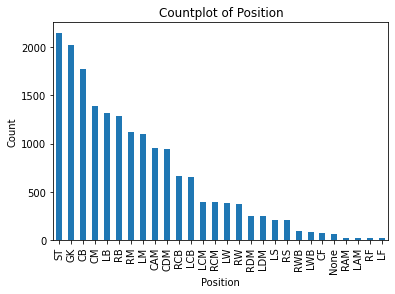

In [ ]:
Pos = fifa['Position'].value_counts()
Pos.plot.bar()
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Countplot of Position')
plt.show()

**Plot the distribution of Overall rating for all players.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


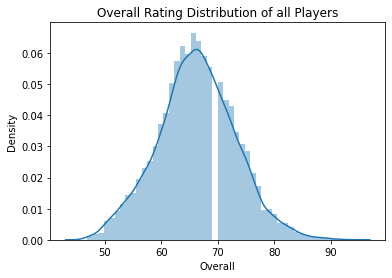

In [ ]:
sns.distplot(fifa.Overall)
plt.title("Overall Rating Distribution of all Players")
plt.savefig("Distribution.png",dpi=100)
plt.show()

**Generate pair plots for the following variables: 
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause**

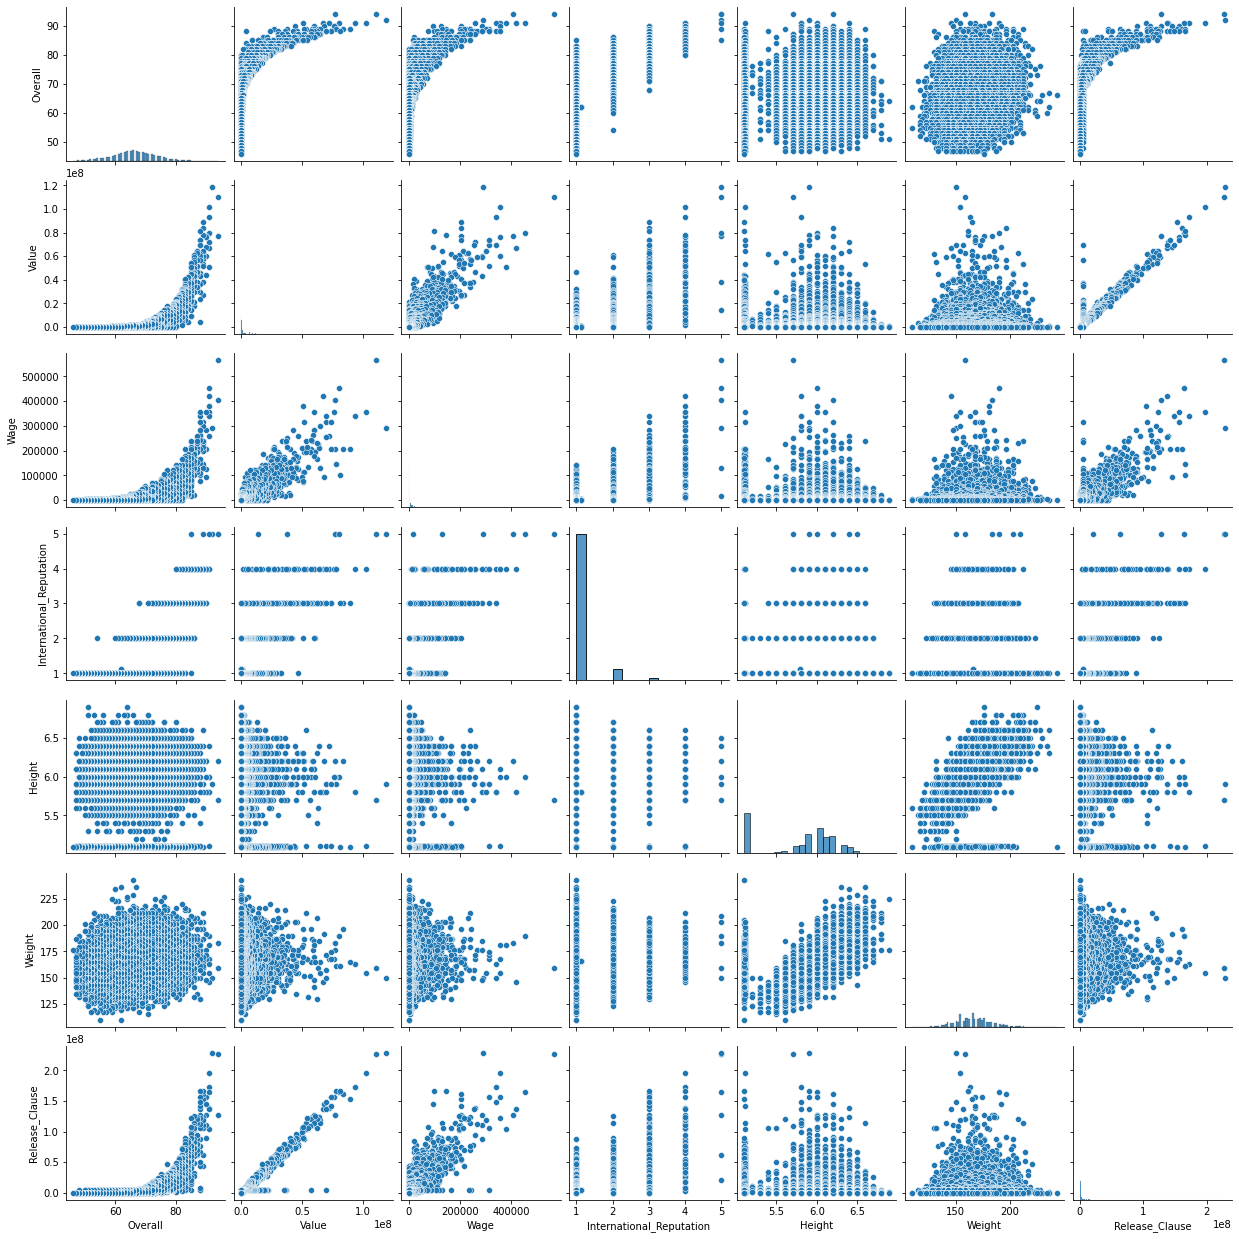

In [ ]:
sns.pairplot(data=fifa[['Overall','Value','Wage','International_Reputation','Height','Weight','Release_Clause']])
plt.savefig("Pairplot.png",dpi=100)
plt.show()

Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [ ]:
top_20_players=fifa[(fifa['Contract_Valid_Until']>='2020-01-01') & 
           (fifa['Contract_Valid_Until']<='2020-12-31')].sort_values(by=['Overall'],ascending=[False],axis=0).head(20)
top_20_players.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Jersey_Number,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,NaN,2020-01-01,6.4,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,Lean,RCM,10.0,2012,NaN,2020-01-01,5.8,146.0,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,15.0,2005,NaN,2020-01-01,6.0,181.0,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,2012,NaN,2020-01-01,5.8,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,Normal,LCM,21.0,2010,NaN,2020-01-01,5.8,148.0,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0


1) What would the average wage for this set of players be?

In [ ]:
top_20_players.Wage.mean()

205450.0

2) What is the average age?

In [ ]:
top_20_players.Age.mean()

30.65

3) Is there a correlation between the Overall rating and Value for these players?

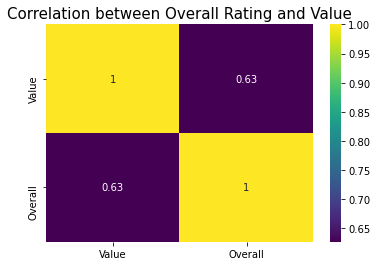

In [ ]:
sns.heatmap(fifa[['Value','Overall']].corr(),cmap = 'viridis',annot=True)
plt.title("Correlation between Overall Rating and Value",fontsize=15)
plt.savefig("Correlation.png",dpi=100)
plt.show()

 From the above heatmap it is clear that "Overall" rating and "Value" of these players are correleated.

**Generate tables containing the top 5 players by Overall rating for each unique position.**

In [ ]:
top_5_Players = fifa.sort_values(by=['Overall'],ascending=[False]).groupby(by='Position').head(5).sort_values(['Position','Overall'], ascending=[False,False])
top_5_Players.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Jersey_Number,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,NaN,2022-01-01,6.2,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,4.0,4.0,4.0,High/ Medium,Normal,ST,9.0,2014,NaN,2021-01-01,6.0,176.0,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,65.0,89.0,77.0,78.0,78.0,90.0,78.0,88.0,84.0,78.0,84.0,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,4.0,4.0,4.0,High/ Medium,Stocky,ST,10.0,2011,NaN,2021-01-01,5.8,154.0,70.0,93.0,77.0,81.0,85.0,89.0,82.0,73.0,64.0,89.0,88.0,80.0,86.0,90.0,91.0,88.0,81.0,76.0,73.0,83.0,65.0,24.0,92.0,83.0,83.0,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,3.0,4.0,3.0,High/ High,Normal,ST,9.0,2010,NaN,2024-01-01,6.2,196.0,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
36,173731,G. Bale,28,Wales,88,88,Real Madrid,60000000.0,355000.0,Left,4.0,3.0,4.0,High/ Medium,Lean,ST,11.0,2013,NaN,2022-01-01,6.1,181.0,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,123000000.0


**Are there any players appearing in more than one Table. Please point out such players.**

In [ ]:
top_5_Players[top_5_Players.Name.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred_Foot,International_Reputation,Weak_Foot,Skill_Moves,Work_Rate,Body_Type,Position,Jersey_Number,Joined,Loaned_From,Contract_Valid_Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release_Clause


**What is the average wage one can expect to pay for the top 5 in every position?**

In [ ]:
top_5_Players.groupby(by='Position').Wage.mean().sort_values(ascending=False)

Position
ST      294000.0
LW      261000.0
RCM     257400.0
RCB     219000.0
RW      202000.0
CDM     199200.0
LCM     195400.0
GK      192800.0
LB      177200.0
CAM     174000.0
LM      169000.0
LCB     162000.0
RB      155400.0
RF      148000.0
LDM     138000.0
RM      133000.0
CM      130600.0
LS      130600.0
RS      130400.0
CB      124800.0
LF      123200.0
RDM     105000.0
LAM      81600.0
CF       47400.0
RAM      46600.0
RWB      44200.0
LWB      33000.0
None         0.0
Name: Wage, dtype: float64